In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('/Users/jolene/Documents/NYCU/Machine Learning/HW3')
from RandomDataGenerator import Random_data_Generator

In [5]:
class Logistic:
    def __init__(self, N, mx1, vx1, my1, vy1, mx2, vx2, my2, vy2, lr=0.0001):
        self.N = N
        self.mx1 = mx1
        self.vx1 = vx1
        self.my1 = my1
        self.vy1 = vy1
        self.mx2 = mx2
        self.vx2 = vx2
        self.my2 = my2
        self.vy2 = vy2
        self.lr = lr
        self.w = np.zeros([3, 1])
        
    def gen_data(self):
        d1, d2 = [], []
        for i in range(self.N):
            x_d1 = Random_data_Generator(self.mx1, self.vx1)
            y_d1 = Random_data_Generator(self.my1, self.vy1)
            d1.append([x_d1, y_d1, 0])
            
            x_d2 = Random_data_Generator(self.mx2, self.vx2)
            y_d2 = Random_data_Generator(self.my2, self.vy2)
            d2.append([x_d2, y_d2, 1])
            
        data = np.array(d1 + d2)
        np.random.shuffle(data)
        return data
    
    # prevent overflow
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def prepare_data(self, data):
        X = np.hstack([np.ones((len(data), 1)), data[:, :-1]]) # design matrix
        y = data[:, -1].reshape(-1, 1)  # label
        return X, y
    
    def optimize(self, data, method = 'gradient'):
        X, y = self.prepare_data(data)
        iter_n = 0
        
        while True:
            pred = self.sigmoid(X @ self.w)
            partial_J = X.T @ (pred - y)
            
            if method == 'newton':
                D = np.zeros((len(X), len(X)))
                np.fill_diagonal(D, pred * (1 - pred))
                update_w = self.w - np.linalg.pinv(X.T @ D @ X) @ partial_J
            else:
                update_w = self.w - self.lr * partial_J
            
            if np.linalg.norm(update_w - self.w) < 1e-4 or iter_n > 1e4:
                break
            
            self.w = update_w
            iter_n += 1
        return X, y, self.w

    def confusion_matrix(self, pred, y):
        TP = np.sum((pred == 1) & (y == 1))
        FP = np.sum((pred == 1) & (y == 0))
        TN = np.sum((pred == 0) & (y == 0))
        FN = np.sum((pred == 0) & (y == 1))
        
        confusion = pd.DataFrame(
            {'Predict cluster 1':[TN, FP], 'Predict cluster 2':[FN, TP]}, 
            index=["Is cluster 1", "Is cluster 2"]
            )
        
        sensitivity = TN/(FP+TN)
        specificity = TP/(TP+FN)
        return confusion, sensitivity, specificity
        
    def plot(self, data):
        
        for i, (title, method) in enumerate([
            ('Ground truth', None),
            ('Gradient descent', 'gradient'),
            ("Newton's method", 'newton')
        ]):
            plt.subplot(1, 3, i+1)
            
            # print result
            if method:
                X, y, w = self.optimize(data, method)
                pred = (self.sigmoid(X @ w) > 0.5).astype(int).reshape(-1, 1)
                plot_data = np.hstack([X[:, 1:], pred])
                conf, sens, spec = self.confusion_matrix(pred, y)
                
                print(f'{title}:\nw:\n', w, '\n')
                print('Confusion Matrix:', conf)
                print('Sensitivity (Successfully predict cluster 1): ', sens)
                print('Specificity (Successfully predict cluster 2): ', spec)
                
                if i != 2:
                    print('-' * 50)
            else:
                plot_data = data
                
            # plot data
            for label, color in [(0, 'red'), (1, 'blue')]:
                split_idx = plot_data[:, 2] == label
                plt.scatter(plot_data[split_idx, 0], plot_data[split_idx, 1], c=color)
                
            plt.title(title)
            
        plt.show()
    

## Case1: N=50, mx1=1, vx1=2, my1=1, vy1=2, mx2=10, vx2=4, my2=10, vy2=4

Gradient descent:
w:
 [[-4.7668642 ]
 [ 0.45880776]
 [ 0.52499892]] 

Confusion Matrix:               Predict cluster 1  Predict cluster 2
Is cluster 1                 50                  0
Is cluster 2                  0                 50
Sensitivity (Successfully predict cluster 1):  1.0
Specificity (Successfully predict cluster 2):  1.0
--------------------------------------------------
Newton's method:
w:
 [[-5064.35914801]
 [  260.71328646]
 [  392.37768186]] 

Confusion Matrix:               Predict cluster 1  Predict cluster 2
Is cluster 1                 50                  0
Is cluster 2                  0                 50
Sensitivity (Successfully predict cluster 1):  1.0
Specificity (Successfully predict cluster 2):  1.0


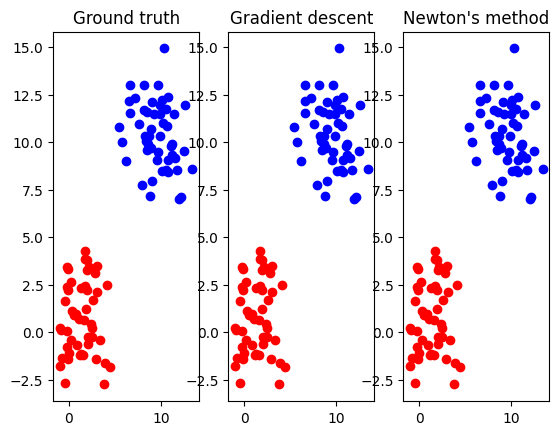

In [8]:
case1 = Logistic(N=50, mx1=1, vx1=2, my1=1, vy1=2, mx2=10, vx2=4, my2=10, vy2=4)
data = case1.gen_data()
case1.plot(data)

## Case 2: N=50, mx1=1, vx1=2, my1=1, vy1=2, mx2=3, vx2=4, my2=3, vy2=4

Gradient descent:
w:
 [[-2.70924528]
 [ 0.67397788]
 [ 0.74805804]] 

Confusion Matrix:               Predict cluster 1  Predict cluster 2
Is cluster 1                 40                 10
Is cluster 2                 10                 40
Sensitivity (Successfully predict cluster 1):  0.8
Specificity (Successfully predict cluster 2):  0.8
--------------------------------------------------
Newton's method:
w:
 [[-3.12320106]
 [ 0.75137544]
 [ 0.84887349]] 

Confusion Matrix:               Predict cluster 1  Predict cluster 2
Is cluster 1                 41                 10
Is cluster 2                  9                 40
Sensitivity (Successfully predict cluster 1):  0.82
Specificity (Successfully predict cluster 2):  0.8


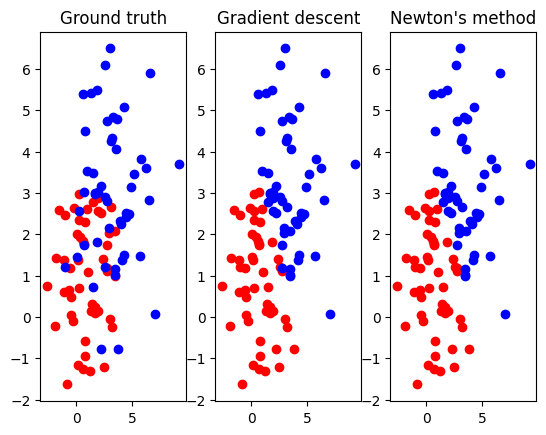

In [9]:
case2 = Logistic(N=50, mx1=1, vx1=2, my1=1, vy1=2, mx2=3, vx2=4, my2=3, vy2=4)
data = case2.gen_data()
case2.plot(data)